# Market Performance of US Big Tech vs S&P 500 (2014–2024) and Sector Resilience During the 2022 Bear Market



**Author:** Andrew Chen, Annie Luo 

## 1. Abstract

This project analyzes the performance of major US tech companies including Google, Apple and Amazon, compared to the S&P 500 (SPY) over the past ten years, with an additional focus on market behavior during 2022, a bearish year. Using historical stock price data, we computed daily and cumulative returns, annual returns, and maximum drawdowns to quantify both long-term growth and downside risk.

Our findings show that while tech stocks significantly outperformed the S&P 500 over the decade, Apple, Amazon, and Google grew approximately 15×, 12× and 7× respectively, compared to SPY’s 4×, they also experienced much larger drawdowns during market downturns. In 2022, Amazon fell over 50% from its peak, followed by Google by 43.6% and Apple  by 30.35%, highlighting the higher volatility and risk associated with high-growth tech stocks.

We also examined defensive sectors, including Consumer Staples (XLP), Utilities (XLU), and Health Care (XLV). These sectors exhibited slower but steadier growth and smaller drawdowns, demonstrating their role as stabilizers in investment portfolios. Beyond lowering financial risk, defensive stocks can also support investor psychologically during bear markets by reducing emotion driven decisions.

Overall, this project highlights the trade-off between high returns and higher risk in big tech company investments and emphasizes the role of defensive sectors for portfolio stability in bear markets.

Link to Github: https://github.com/Andrewchenyh/Stock-Performance-Analysis

## 2. Introduction

<p align="center">
  <img src="performance.png" width="70%">
</p>


Our motivation for this project comes from both our academic background and our personal interests. As students studying economics and statistics, we’ve learned tools for understanding financial markets, measuring risk, and evaluating performance. At the same time, we’ve recently started investing in the stock market, which  made us more curious about portfolio management and how to build long-term wealth. That combination of coursework and real-world interest shaped the direction of this analysis.

Recently, we’ve heard a lot about how quickly major US technology companies have been growing. These firms dominate market headlines, impact the overall stock market and are among the most popular holdings among retail investors. That led us to our first question: 

1. How did these Big Tech companies actually perform, and by how much did they outperform the S&P 500?

To investigate this question, we conducted a detailed performance comparison between the major tech companies and the S&P 500 index.

However, performance alone doesn’t tell the full story. An analysis conducted by JP Morgan shows that retail investors consistently underperform the S&P 500 over the past decade except one year, despite the massive gains in the most widely held tech stocks. This contrast leads to the second part of this project, as we tried to figure out: If retail investors are investing heavily in the same well performing companies, why do they still lag behind the market?

Reflecting on the data, we noticed that during market downturns, especially in 2022, retail investors experienced extremely large negative returns, over –50%. This suggested that losses during bear markets wipe out the gains from bull markets. In other words, although retail investors may pick the long-term well-performing stocks, they struggle with risk management and maintaining discipline during declines.

That insight motivated our second question: 

2. How can investors hedge risks during bear markets and keep a stable mindset?

To answer this question, we examined the performance of defensive sectors and analyzed how they behave when the broader market falls.

Together, these two questions consist the core of our project. By understanding both growth opportunities and downside protection, we aim to explore how investors might construct portfolios that not only participate in market gains but also survive market stress.

## 3. Methods

### 3.1 Data Acquisition

In this section, we describe how the dataset for the project is collected, including a list of S&P 500 companies from Wikipedia and the historical stock data from yfinance Python library. 

The data acquisition process includes two parts: 

1.  Scraping the list of S&P 500 components from Wikipedia using BeautifulSoup

2.  Retrieving historical price data using the yfinance Python library

First we scraped the S&P 500 companies table directly from Wikipedia. The tables contains important information such as ticker symbols, company names and GICS sectors. We stored the table in a Pandas DataFrame.

In [100]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import yfinance as yf
from io import StringIO

In [99]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"id": "constituents"})
df_sp500 = pd.read_html(StringIO(str(table)))[0]
df_sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [119]:
df_sp500['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

To examine how major US tech companies performed relative to the broader market, we intentionally companies from differnet GICS sectors. We selected Apple (AAPL), Google (GOOG) and Amazon (AMZN), which are the leading companies in their sectors.

- Apple (AAPL): Information Technology

- Google (GOOG): Communication Services

- Amazon (AMZN): Consumer Discretionary

Choosing companies across multiple sectors allows us to capture a more representative trend of large-cap tech company performance. This cross-sector selection strengthens our analysis by showing performance of the companies retail investors in favor of.

For our defensive-sector analysis, we focused on three well-know defensive ETFs:

- XLP: Consumer Staples

- XLU: Utilities

- XLV: Health Care

These sectors are traditionally considered defensive because these industries provide essential goods and services people continue to buy and use regardless of economic conditions.

- Consumer staples (XLP) includes food, beverages and household products.

- Utilities (XLU) includes electricity, water and gas.

- Health care (XLV) includes medical services, pharmaceuticals and biotechnology.


By selecting these three ETFs, we captured the core defensive areas in the market. They provide slower but steadier growth and typically experience smaller drawdowns compared to high-growth tech stocks. This makes them ideal for understanding how investors can hedge risks and diversify their portfolio.

In [118]:
big_tech = df_sp500[df_sp500['Symbol'].isin(["AAPL", "GOOG", "AMZN"])]
big_tech

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
20,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
22,AMZN,Amazon,Consumer Discretionary,Broadline Retail,"Seattle, Washington",2005-11-18,1018724,1994
38,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977


Then we defined a helper function using yfinance API to access the Yahoo Finance datasets. We will use this function to collect the stock price history of interested tickers from 2014 to 2024.


In [17]:
def extract_stock_data(symbol, start, end):
    ticker = yf.Ticker(symbol)
    df = ticker.history(start = start, end = end)
    df.reset_index(inplace=True)
    return df


In [31]:
tickers = ["SPY", "GOOG", "AAPL", "AMZN", "XLP", "XLU", "XLV"]

start_date = "2014-01-01"
end_date = "2025-01-01"


aapl_df = extract_stock_data("AAPL", start_date, end_date)
amzn_df = extract_stock_data("AMZN", start_date, end_date)
goog_df = extract_stock_data("GOOG", start_date, end_date)
spy_df = extract_stock_data("SPY", start_date, end_date)
xlp_df = extract_stock_data("XLP", start_date, end_date)
xlv_df = extract_stock_data("XLV", start_date, end_date)
xlu_df = extract_stock_data("XLU", start_date, end_date)

### 3.2 Feature Engineering

To analyze performance and risk, we need daily returns and cumulative returns of each stock. These two features are important in analyzing short‑term volatility and long‑term growth. It also allows us to explore the risks during market downturns.

The feature engineering process includes two parts:

Daily returns: Measure the percentage change in closing price from one day to the next.

Cumulative returns: Tracks the growth of a $1 investment over time.

In [34]:
def daily_returns(df):
    df = df.copy()
    df["Daily Return"] = df["Close"].pct_change()
    return df

aapl_df = daily_returns(aapl_df)
amzn_df = daily_returns(amzn_df)
goog_df = daily_returns(goog_df)
spy_df = daily_returns(spy_df)
xlp_df = daily_returns(xlp_df)
xlv_df = daily_returns(xlv_df)
xlu_df = daily_returns(xlu_df)

In [36]:
def cumulative_returns(df):
    df = df.copy()
    df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod()
    return df
    
aapl_df = cumulative_returns(aapl_df)
amzn_df = cumulative_returns(amzn_df)
goog_df = cumulative_returns(goog_df)
spy_df = cumulative_returns(spy_df)
xlp_df = cumulative_returns(xlp_df)
xlv_df = cumulative_returns(xlv_df)
xlu_df = cumulative_returns(xlu_df)    

We saved the DataFrames to csv files for future references.

In [72]:
aapl_df.to_csv('aapl.csv')
amzn_df.to_csv('amzn.csv')
goog_df.to_csv('goog.csv')
spy_df.to_csv('spy.csv')
xlp_df.to_csv('xlp.csv')
xlv_df.to_csv('xlv.csv')
xlu_df.to_csv('xlu.csv')


## 4. Results

### 4.1 Ten-Year Performance

To evaluate long-term performance, we compared the cumulative growth of SPY with three major American tech companies: Apple, Google, and Amazon. The analysis focuses on the ten years peroid from 2014 to 2024. 

First we visualize the historical prices trend in a 2×2 grid of line plots. 


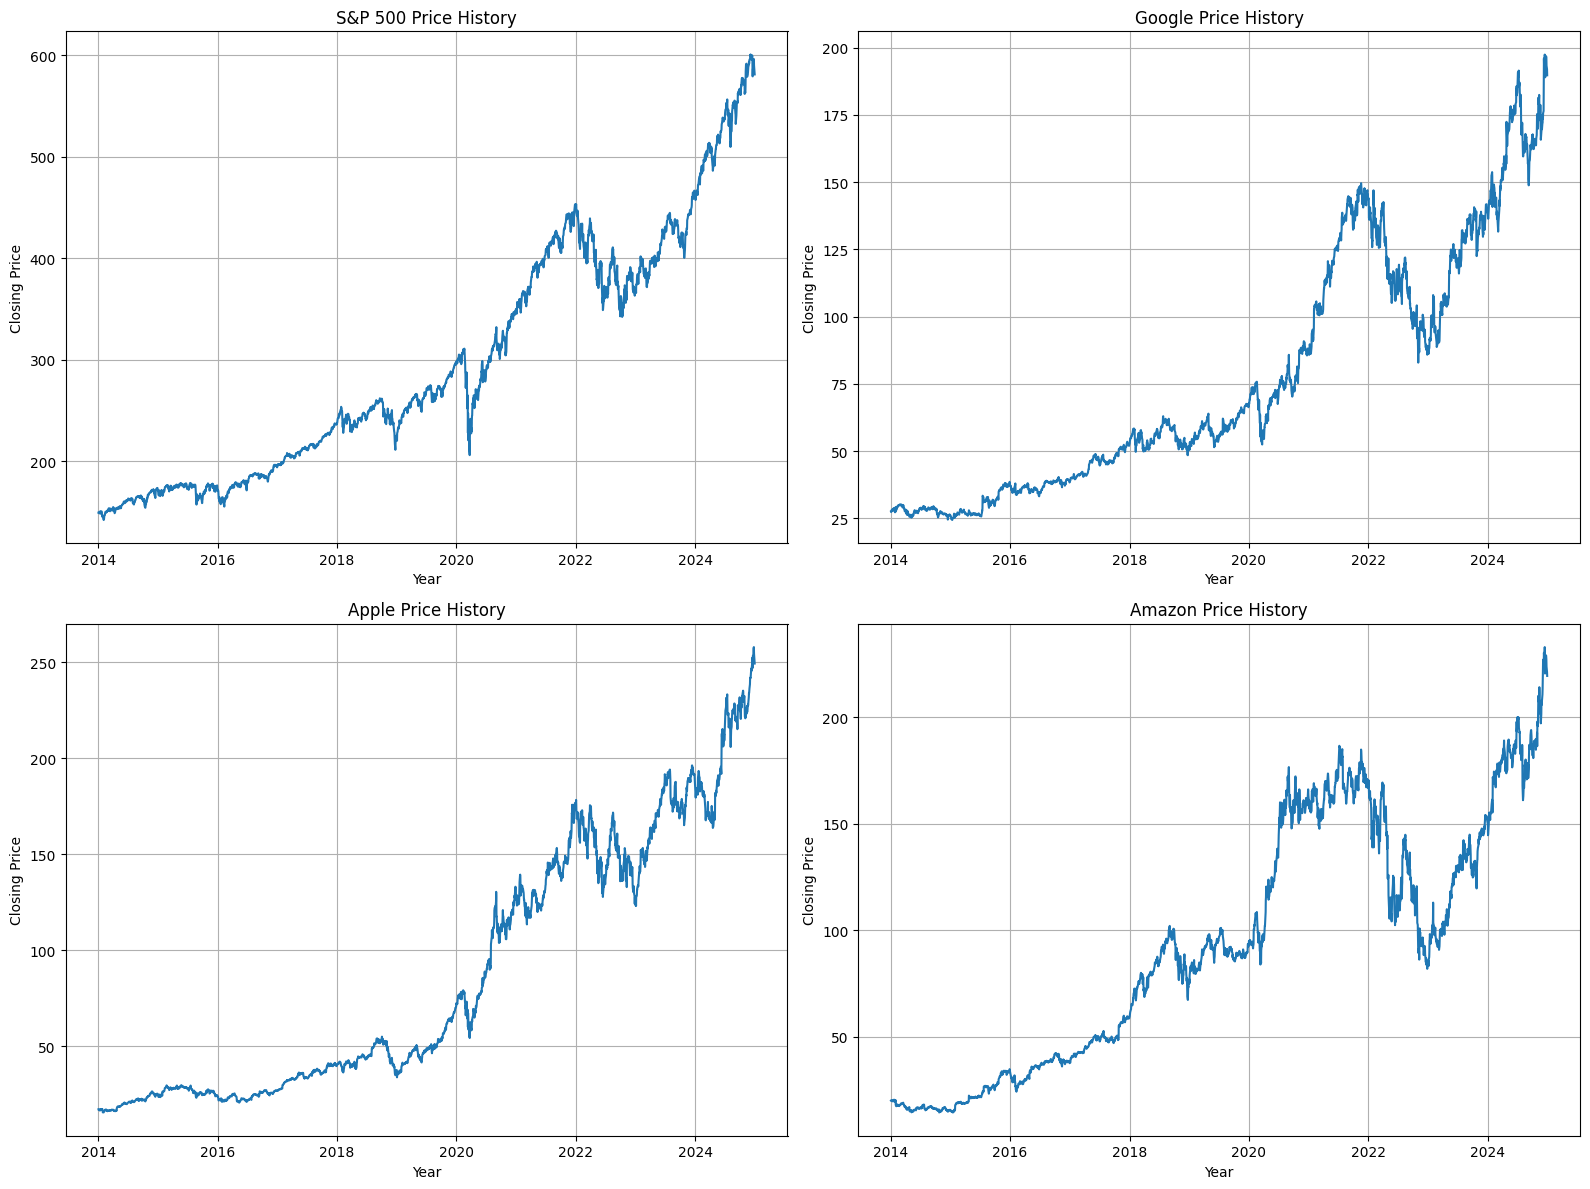

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

axes[0][0].plot(spy_df["Date"], spy_df["Close"])
axes[0][0].set_title("S&P 500 Price History")
axes[0][0].set_xlabel("Year")
axes[0][0].set_ylabel("Closing Price")
axes[0][0].grid()

axes[0][1].plot(goog_df["Date"], goog_df["Close"])
axes[0][1].set_title("Google Price History")
axes[0][1].set_xlabel("Year")
axes[0][1].set_ylabel("Closing Price")
axes[0][1].grid()

axes[1][0].plot(aapl_df["Date"], aapl_df["Close"])
axes[1][0].set_title("Apple Price History")
axes[1][0].set_xlabel("Year")
axes[1][0].set_ylabel("Closing Price")
axes[1][0].grid()

axes[1][1].plot(amzn_df["Date"], amzn_df["Close"])
axes[1][1].set_title("Amazon Price History")
axes[1][1].set_xlabel("Year")
axes[1][1].set_ylabel("Closing Price")
axes[1][1].grid()

plt.tight_layout()
plt.show()



The line plot above shows that all four assets basically follow an upward trend over the ten years peroid. However, since their raw prices are different, it's hard to compare growth based on price alone.

To address this, we convert each series into cumulative returns. Instead of focusing on the prices, we emphasized the growth rate by forcing all assets to start at the same initial investment. This standardization assumes a $1 initial investment and allows us to visualize how this one dollar grows in the ten years peroid. Therefore, we can easily compare the performance between different asstes.


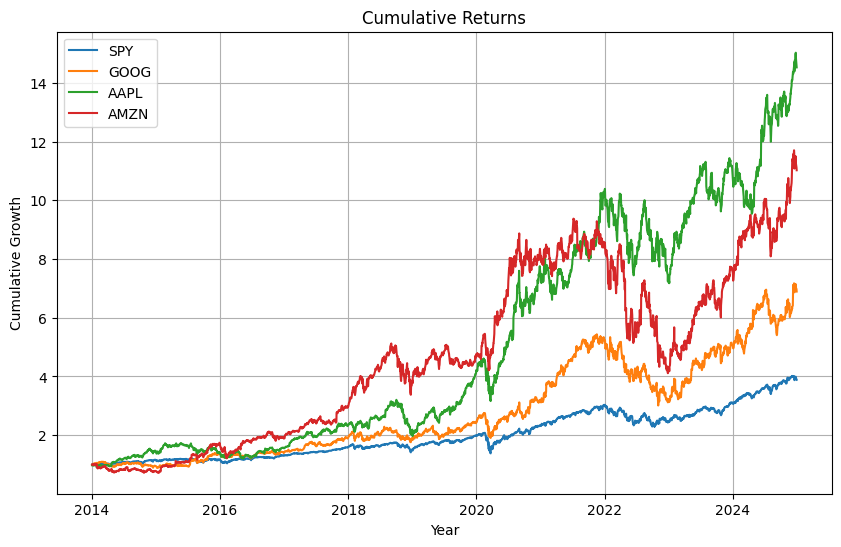

In [124]:
plt.figure(figsize=(10, 6))

plt.plot(spy_df["Date"], spy_df["Cumulative Return"], label="SPY")
plt.plot(goog_df["Date"], goog_df["Cumulative Return"], label="GOOG")
plt.plot(aapl_df["Date"], aapl_df["Cumulative Return"], label="AAPL")
plt.plot(amzn_df["Date"], amzn_df["Cumulative Return"], label="AMZN")

plt.title("Cumulative Returns")
plt.xlabel("Year")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.grid()
plt.show()


Based on the cumulative return curves, Apple shows the strongest long-term performance, growing to nearly 15× its starting value. Amazon follows by roughly 12×, and Google reaches around 7×. In comparison, the S&P 500 grows to about 4× over the same period. 

Although 4× over ten years is considered as a very decent return, it was overshadowed by the stunning growth of these three major US tech companies. This highlights how much faster large tech firms have expanded relative to the overall market during this peroid.

### 4.2 Bear Market Behavior (2022)

While the ten year overall performance demonstrates impressive long-term growth for both S&P 500 and leading tech companies like Apple, Amazon and Google, we cannot ignore the underlying risks. To understand how each asset behaves under pressure and uncertainty, we focus on 2022, a bearish year marked by increasing interest rates, inflation surge and disruption of global supply chain.

We analyzed the whole year returns and maximum drawdowns in year 2020 for SPY, Apple, Amazon and Google and tried to find out how they performed in the bear market. 

We extracted the closing prices in year 2022 and turned them into Python lists.

In [79]:
spy_2022 = spy_df[spy_df["Date"].dt.year == 2022]["Close"].tolist()
goog_2022 = goog_df[goog_df["Date"].dt.year == 2022]["Close"].tolist()
aapl_2022 = aapl_df[aapl_df["Date"].dt.year == 2022]["Close"].tolist()
amzn_2022 = amzn_df[amzn_df["Date"].dt.year == 2022]["Close"].tolist()

In [92]:
def annual_return_2022(prices):
    start_price = prices[0]
    end_price = prices[-1]
    return (end_price - start_price) / start_price

spy_return_2022 = annual_return_2022(spy_2022)
goog_return_2022 = annual_return_2022(goog_2022)
aapl_return_2022 = annual_return_2022(aapl_2022)
amzn_return_2022 = annual_return_2022(amzn_2022)

print("SPY 2022 return:", f"{spy_return_2022*100:.2f}%")
print("GOOG 2022 return:", f"{goog_return_2022*100:.2f}%")
print("AAPL 2022 return:", f"{aapl_return_2022*100:.2f}%")
print("AMZN 2022 return:", f"{amzn_return_2022*100:.2f}%")


SPY 2022 return: -18.65%
GOOG 2022 return: -38.84%
AAPL 2022 return: -28.20%
AMZN 2022 return: -50.71%


To quantify how each asset behaved during the 2022 bear market, we calculated the full year returns. As expected, 2022 proved to be a tough year across the board, with all four equities experiencing negative performance:

- SPY: −18.65%

- Google: −38.84%

- Apple: −28.20%

- Amazon: −50.71%  

To measure how severely each asset declined during 2022, we defined a function to compute maximum drawdown. Drawdown measures an investment's value from a peak to a subsequent trough, as a percentage.

The function tracks the running maximum price up to each date and computes the current drop from that peak.
This allows us to compare how severely each stock fell relative to its own peak.

In [85]:
def max_drawdown(prices):
    running_max = prices[0]
    max_drop_val = 0
    max_drop_pct = 0
    
    for price in prices:
        if price > running_max:
            running_max = price
            continue
        
        drop_val = running_max - price
        drop_pct = drop_val / running_max
        
        if drop_val > max_drop_val:
            max_drop_val = drop_val
            max_drop_pct = drop_pct
    
    return max_drop_val, max_drop_pct


In [91]:
spy_drop, spy_drop_pct = max_drop(spy_2022)
print("SPY max drop:", spy_drop)
print("SPY max drawdown:", f"{spy_drop_pct*100:.2f}%")

goog_drop, goog_drop_pct = max_drop(goog_2022)
print("GOOG max drop:", goog_drop)
print("GOOG max drawdown:", f"{goog_drop_pct*100:.2f}%")

aapl_drop, aapl_drop_pct = max_drop(aapl_2022)
print("AAPL max drop:", aapl_drop)
print("AAPL max drawdown:", f"{aapl_drop_pct*100:.2f}%")

amzn_drop, amzn_drop_pct = max_drop(amzn_2022)
print("AMZN max drop:", amzn_drop)
print("AMZN max drawdown:", f"{amzn_drop_pct*100:.2f}%")



SPY max drop: 111.02017211914062
SPY max drawdown: 24.50%
GOOG max drop: 64.06602478027344
GOOG max drawdown: 43.60%
AAPL max drop: 54.10353088378906
AAPL max drawdown: 30.35%
AMZN max drop: 88.5844955444336
AMZN max drawdown: 51.98%


We observed: SPY fell about 24.5%, establishing a baseline for comparison. Amazon experienced the steepest decline, losing more than 50% from its peak in 2022. Google followed closely with a 43.6% drawdown. And Applewas hit by a 30.35% decline.

These results show that while tech companies outperform the S&P 500 over long periods, they also tend to experience much larger drawdowns during bearish markets.

From an investor’s perspective, this volatility can cause panic. When prices fall quickly, many people panic-sell out of fear, often suffering losses at the worst possible time. This is the risk of high-growth stocks like tech companies, because strong growth comes with significantly higher downside risk, especially during periods of market stress.

### 4.3 Defensive Sector Analysis

The results from the 2022 bear market analysis above highlight that while tech companies deliver impressive long-term returns, they also expose investors to higher risks of deeper losses. This raises an important question: are there parts of the market that offer greater stability during downturns?

To explore this, we now shift our focus to defensive sectors such as Consumer Staples (XLP), Utilities (XLU), and Healthcare (XLV). These sectors are known for their steadier demand and historical  milder drawdowns during recessionary periods.

In this section, we analyzed their performance and evaluated whether defensive sectors provided meaningful protection during the 2022 bear market.

In [97]:
xlp_return_2022 = annual_return_2022(xlp_2022)
xlu_return_2022 = annual_return_2022(xlu_2022)
xlv_return_2022 = annual_return_2022(xlv_2022)

print("XLP 2022 return:", f"{xlp_return_2022*100:.2f}%")
print("XLU 2022 return:", f"{xlu_return_2022*100:.2f}%")
print("XLV 2022 return:", f"{xlv_return_2022*100:.2f}%")


XLP 2022 return: -0.80%
XLU 2022 return: 2.46%
XLV 2022 return: -1.06%


We calculated the annual returns for selected defensive sectors to assess their resilience during the 2022 bear market and obtained the results:

- Consumer Staples (XLP): -0.80%

- Utilities (XLU): +2.46%

- Healthcare (XLV): -1.06%

These results indicate that defensive sectors experienced much smaller losses, or even slight gains, compared to the major tech stocks and the S&P 500. This demonstrates their potential role as a stabilizing component in a portfolio during bearish market.

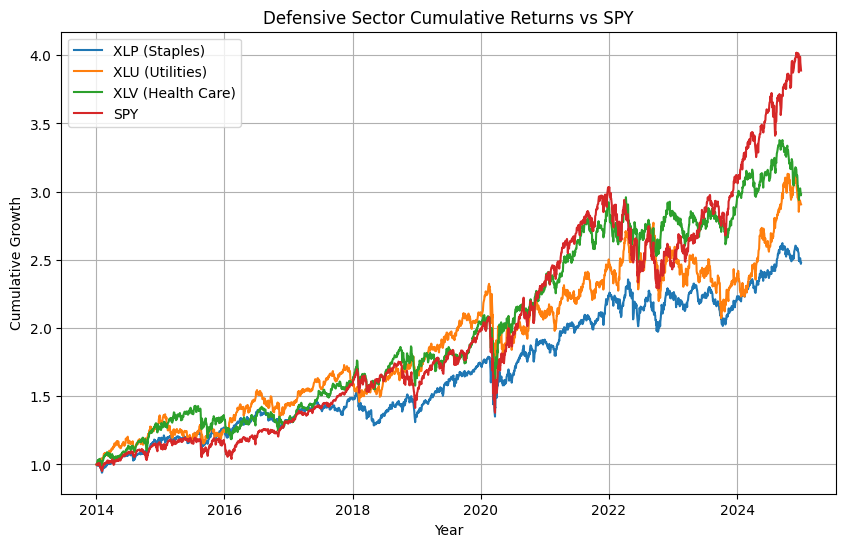

In [123]:
plt.figure(figsize=(10, 6))

plt.plot(xlp_df["Date"], xlp_df["Cumulative Return"], label="XLP (Staples)")
plt.plot(xlu_df["Date"], xlu_df["Cumulative Return"], label="XLU (Utilities)")
plt.plot(xlv_df["Date"], xlv_df["Cumulative Return"], label="XLV (Health Care)")
plt.plot(spy_df["Date"], spy_df["Cumulative Return"], label="SPY")

plt.title("Defensive Sector Cumulative Returns vs SPY")
plt.xlabel("Year")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.grid()
plt.show()


The plot above compares the cumulative returns of defensive sectors such asXLP, XLU and XLV with the S&P 500.

From the visualization, we can clearly see that defensive sectors generally exhibit slower but steadier growth over time. They experience fewer and smaller drawdowns compared to the broader market, highlighting their role as more resilient investment components.

Beyond the numbers, defensive sectors can provide psychological benefits during market downturns. In a bear market, seeing that not all stocks are plunging or that some are declining much less than the overall market can reduce panic and the chance of emotional selling.

Thus, investing in defensive stocks not only helps lower financial risk but also supports a calmer mindset for long-term investors.

## 5. Summary and Conclusion

In this project, we aim to understand two questions:
1. Do popular big tech stocks truly deliver superior long-term returns?
2. How can investors better manage the portfolio and in case of bear markets like the one in 2022?

Looking back at the 2014–2024 period, our results confirmed that big tech companies massively outperformed the broader market. Leading tech companies such as Apple, Google and Amazon far exceeded the cumulative growth of the S&P 500. However, this outperformance came with higher volatility and larger drawdowns, leading to a fact that is easily neglected when markets are booming.

The 2022 bear market was an example of this tradeoff. While SPY fell around 24%, major tech companies experienced a peak-to-trough losses of 30–50%, a sharp decline that scared many retail investors into selling at the worst possible time. This behavior connects back to the JPMorgan chart we mentioned earlier: retail investors consistently underperform the market, not because they choose the wrong stocks, but because their timing and mindset gets disrupted by fear.

This led into our second question: how can investors cushion risks and maintain a steadier mindset in downturns?
Our analysis of defensive sectors such as XLP (Staples), XLU (Utilities) and XLV (Health Care) shows that these areas decline much less than tech during bearish markets, and in some cases even produce positive returns. Their smoother return paths offer not just financial protection, but also psychological stability to retail investors. As an investor, we understand the feeling of part of your portfolio holds up well when the market is crashing. It becomes easier to stay disciplined instead of panic-selling.

Overall, our project highlights a simple but powerful idea: Strong long-term results come from balancing growth with stability.

Big tech stocks can boost returns in a bullish market, but defensive sectors help investors stay in the market through the hardest periods. Through this project, we learned how different market sectors behave, what drives investor outcomes and how diversified portfolio can support better decision-making.

As for our own investing journey, especially as students starting to build wealth, this is a valuable lesson. Understanding risk, return and investor behavior gives us a better chance not only to earn more, but to avoid the classic mistakes that cause retail investors to lag the market.



## 6. References

Yahoo Finance. (n.d.). *Historical market data for equities and ETFs.* Retrieved via the `yfinance` Python library. https://finance.yahoo.com

Wikipedia contributors. (2025). *List of S&P 500 companies.* In *Wikipedia, The Free Encyclopedia.* Retrieved from https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

J.P. Morgan Asset Management. (2025). *Guide to the Markets: Average investor returns vs. S&P 500 (2015–2025).* Retrieved from https://am.jpmorgan.com

MSCI. (2024). *Global Industry Classification Standard (GICS®): Structure and definitions.* https://www.msci.com/gics

SPDR State Street Global Advisors. (n.d.). *Sector ETFs: XLK, XLY, XLC, XLP, XLV, XLU, XLE, XLF, XLI.* Retrieved from https://www.ssga.com

McKinney, W. (2017). *Python for Data Analysis: Data wrangling with pandas, NumPy, and IPython* (2nd ed.). O’Reilly Media.
